In [ ]:
def fun_mandel(z,c):
    return(z**2+k)

def seg_over(A,B):
    xa, ya = A.real, A.imag
    xb, yb = B.real, B.imag
    k = np.linspace(0,1,100)
    

Test sparse matrix

  (0, 0)	1
  (0, 2)	1
  (1, 1)	1
  (3, 3)	1
  (1, 1)	1
  (0, 0)	1
  (0, 0)	1


<IPython.core.display.Javascript object>


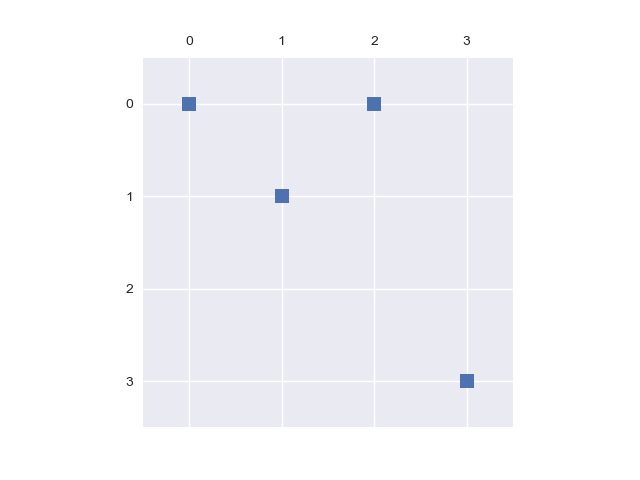

In [1]:
from scipy.sparse import coo_matrix
import numpy as np
import matplotlib.animation as animation
import ffmpeg
import matplotlib.pyplot as plt
import os
import warnings
import seaborn as sns
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from mpl_toolkits import mplot3d

plt.style.use('seaborn')
%matplotlib notebook

row  = np.array([0, 0, 1, 3, 1, 0, 0])
col  = np.array([0, 2, 1, 3, 1, 0, 0])
data = np.array([1, 1, 1, 1, 1, 1, 1])
coo = coo_matrix((data, (row, col)), shape=(4, 4))

print(coo)
plt.spy(coo)

Test Mandelbrot de deux ways

<IPython.core.display.Javascript object>


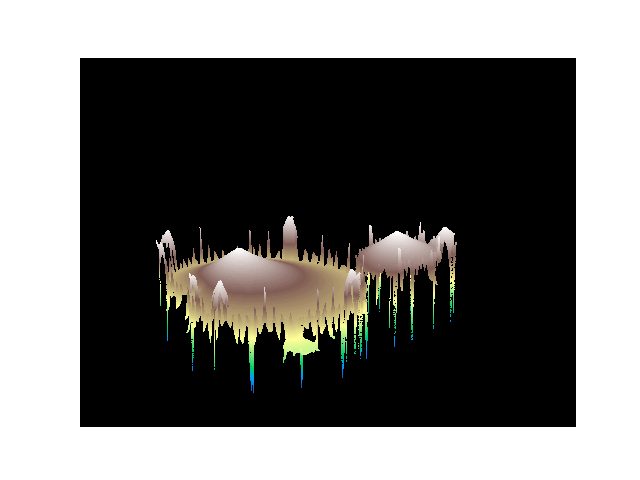

In [4]:
fig = plt.figure()  # set 3D figure environment
ax = fig.add_subplot(111, projection='3d')
ax.view_init(azim=45, elev=45)
ax.dist = 4  # placement
ax.set_facecolor([0.0, 0.0, 0.0])  # couleur fond1
n = 100  # max_ter
dx = -0.6  # placement
dy = 0.0  # placement
L = 2  # carré
M = 300  # dans le linscapce


def f(Z):  # lui faire quitter le plan.... quelle fonction utiliser ? exp(-|x|) ? exp(-x**2) ? faut-il utiliser une fct ??
    return np.e**(-abs(Z))  # np.e**(-Z**2)  #


x = np.linspace(-L+dx, L+dx, M)
y = np.linspace(-L+dy, L+dy, M)
X, Y = np.meshgrid(x, y)  # comme en TP
Z = np.zeros(M)  # la base
W = np.zeros((M, M))  # La base 3d
C = X + 1j*Y  # le plan complexe
for k in range(1, n+1):  # la condirion de mandel
    ZZ = Z**2 + C
    Z = ZZ
    W = f(Z)
ax.set_xlim(dx-L, dx+L)
ax.set_ylim(dy-L, dy+L)
ax.set_zlim(-.5*L, 1.5*L)  # set z axis limits
ax.axis("off")  # do not plot axes
ax.contourf3D(X, Y, W, 2*n, cmap="terrain")  # make contour plot
plt.show()  # show plot

<IPython.core.display.Javascript object>


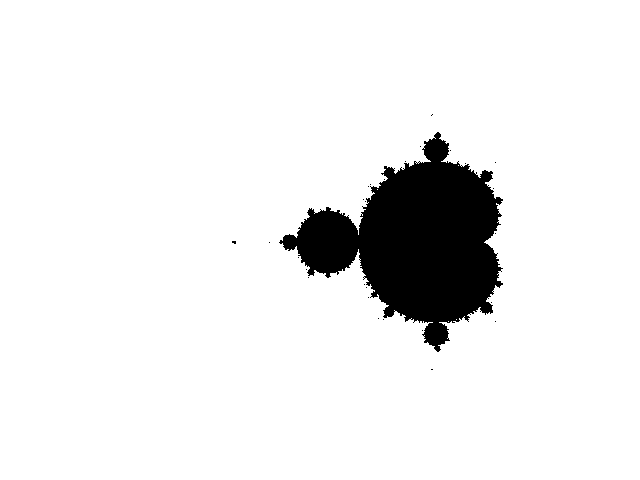

In [49]:
class Mandelbrot_disp2:

    def __init__(self, x, y, facteur, t_max=100, precision=400):
        self.x = x
        self.y = y
        self.facteur = facteur
        self.t_max = t_max
        self.precision = precision

    def mandelbrot(self):
        x, y, facteur, maxiteration, precision = self.x, self.y, self.facteur, self.t_max, self.precision
        # définit l'espace avec une matrice
        X, Y = np.meshgrid(np.arange(x-facteur, x+facteur, 1/precision),
                           np.arange(y-facteur, y+facteur, 1/precision), sparse=True)
        c = X+1j*Y  # nombre complex écrit avec des matrices
        z = c
        # matrice booléenne qui vérifie la condition sur (z_n)
        pasbornee = np.zeros(z.shape, dtype=bool)
        for i in range(maxiteration):
            z = z**2+c
            matrice = abs(z) > 2  # condition sur le cercle
            nouvelle = matrice & ~pasbornee  # le ~est la négation logique
            pasbornee[nouvelle] = True
            # valeur arbitraire pour éviter les overflow je limite la valeur =>
            z[matrice] = 1
            # prévient le problème des deux ci-dessous
        return pasbornee  # renvoi de la matrice booleenne qui indique si la valeur est bornée


    def disp_mandel(self):
        mandel = self.mandelbrot()
        plt.figure()
        plt.imshow(mandel, cmap='bone')  # interpolation induite
        plt.axis('off')
        plt.show()

    def animate_mandel_plt(self, openvid=True):
        im_init = self.mandelbrot()
        fig = plt.figure()
        im = plt.imshow(im_init, cmap='bone')
        plt.axis('off')
        def animate(i):
            im.set_data(Mandelbrot_disp(-1, -.3, 0.4-i/300,
                                        t_max=50, precision=400).mandelbrot())
            return im,

        anim = animation.FuncAnimation(fig, animate, frames=150,interval=2, repeat=False,save_count=200)
        return(anim)
    
    
        


Mandelbrot_disp2(-1, 0, 1.5, precision=400).disp_mandel()

In [48]:
import scipy.sparse as sparse
A = sparse.csr_matrix(Mandelbrot_disp2(-1, 0, 1.5, precision=400).mandelbrot())
plt.spy(A)

<IPython.core.display.Javascript object>


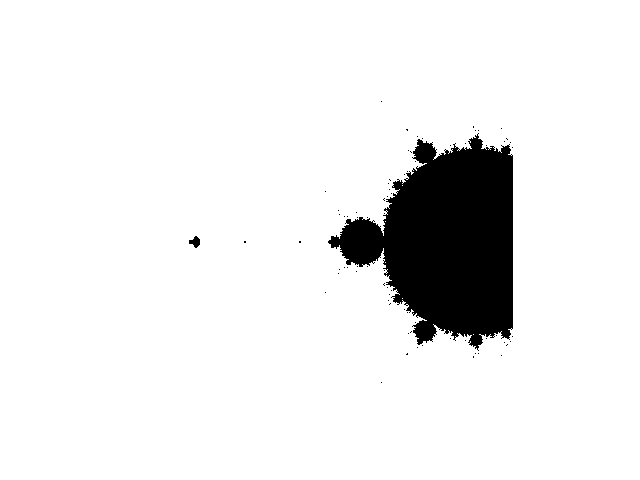

In [2]:
class Mandelbrot_disp:

    def __init__(self, x, y, facteur, t_max=100, precision=400):
        self.x = x
        self.y = y
        self.facteur = facteur
        self.t_max = t_max
        self.precision = precision

    def mandelbrot(self):
        x, y, facteur, maxiteration, precision = self.x, self.y, self.facteur, self.t_max, self.precision
        # définit l'espace avec une matrice
        X, Y = np.meshgrid(np.linspace(x-facteur, x+facteur, precision),
                           np.linspace(y-facteur, y+facteur, precision))
        c = X+1j*Y  # nombre complex écrit avec des matrices
        z = c
        # matrice booléenne qui vérifie la condition sur (z_n)
        pasbornee = np.zeros(z.shape, dtype=bool)
        for i in range(maxiteration):
            z = z**2+c
            matrice = abs(z) > 2  # condition sur le cercle
            nouvelle = matrice & ~pasbornee  # le ~est la négation logique
            pasbornee[nouvelle] = True
            # valeur arbitraire pour éviter les overflow je limite la valeur =>
            z[matrice] = 1
            # prévient le problème des deux ci-dessous
        return pasbornee  # renvoi de la matrice booleenne qui indique si la valeur est bornée


    def disp_mandel(self):
        mandel = self.mandelbrot()
        plt.figure()
        plt.imshow(mandel, cmap='bone')  # interpolation induite
        plt.axis('off')
        plt.show()

    def animate_mandel_plt(self, openvid=True):
        im_init = self.mandelbrot()
        fig = plt.figure()
        im = plt.imshow(im_init, cmap='bone')
        plt.axis('off')
        def animate(i):
            im.set_data(Mandelbrot_disp(self.x-i/900, self.y, 0.7-i/300,
                                        t_max=100, precision=300).mandelbrot())
            return im,

        anim = animation.FuncAnimation(fig, animate, frames=210,interval=2, repeat=False,save_count=200)
        return(anim)
        


Mandelbrot_disp(-1.401155, 0, 0.5, precision=900).disp_mandel()

<IPython.core.display.Javascript object>


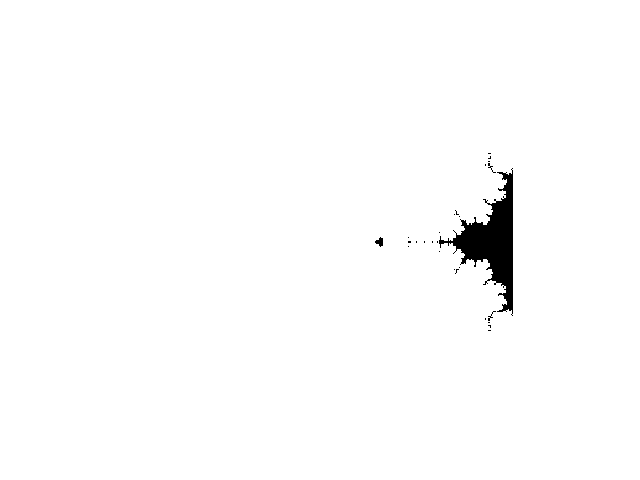

In [13]:
Mandelbrot_disp(-1.401155, 0, 1).animate_mandel_plt()

<IPython.core.display.Javascript object>


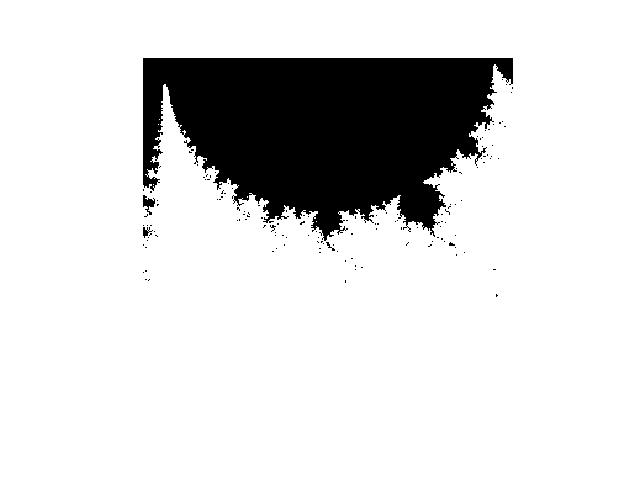

In [3]:
im_init=mandelbrot(-.5,0,1.5)
plt.figure()
fig = plt.gcf()
im = plt.imshow(im_init, cmap='bone')
plt.axis('off')
def animate(i):
    im.set_data(mandelbrot(-1,-.3,0.2-i/200,maxiteration=50,precision=300))
    return im,

anim = animation.FuncAnimation(fig, animate, frames=100)
plt.show()

In [54]:
from vispy import scene
from vispy import app
import numpy as np


canvas = scene.SceneCanvas(keys='interactive')
canvas.size = 800,600
grid = canvas.central_widget.add_grid()

# Create two ViewBoxes, place side-by-side
vb1 = grid.add_view(name='vb1')
canvas.show()

# Set up a viewbox to display the image with interactive pan/zoom
view = canvas.central_widget.add_view()
img_data=Mandelbrot_disp(-.5, 0, 1, t_max=100, precision= 300).mandelbrot()

image = scene.visuals.Image(img_data, cmap='grays', parent=view.scene, interpolation='nearest')

# Set 2D camera (the camera will scale to the contents in the scene)
view.camera = scene.PanZoomCamera(aspect=1)
view.camera.set_range()
view.camera.flip = (0, 1, 0)
app.run()

VispyWidget(height=600, width=800)

In [63]:

from vispy import app, gloo

# Shader source code
# -----------------------------------------------------------------------------
vertex = """
attribute vec2 position;
void main()
{
    gl_Position = vec4(position, 0, 1.0);
}
"""

fragment = """
uniform vec2 resolution;
uniform vec2 center;
uniform float scale;
vec3 hot(float t)
{
    return vec3(smoothstep(0.00,0.33,t),
                smoothstep(0.33,0.66,t),
                smoothstep(0.66,1.00,t));
}
void main()
{
    
    const int n = 300;
    const float log_2 = 0.6931471805599453;
    vec2 c;
    // Recover coordinates from pixel coordinates
    c.x = (gl_FragCoord.x / resolution.x - 0.5) * scale + center.x;
    c.y = (gl_FragCoord.y / resolution.y - 0.5) * scale + center.y;
    float x, y, d;
    int i;
    vec2 z = c;
    for(i = 0; i < n; ++i)
    {
        x = (z.x*z.x - z.y*z.y) + c.x;
        y = (z.y*z.x + z.x*z.y) + c.y;
        d = x*x + y*y;
        if (d > 4.0) break;
        z = vec2(x,y);
    }
    if ( i < n ) {
        float nu = log(log(sqrt(d))/log_2)/log_2;
        float index = float(i) + 1.0 - nu;
        float v = pow(index/float(n),0.5);
        gl_FragColor = vec4(hot(v),1.0);
    } else {
        gl_FragColor = vec4(hot(0.0),1.0);
    }
}
"""


# vispy Canvas
# -----------------------------------------------------------------------------
class Canvas(app.Canvas):

    def __init__(self, *args, **kwargs):
        app.Canvas.__init__(self, *args, **kwargs)
        self.program = gloo.Program(vertex, fragment)

        # Draw a rectangle that takes up the whole screen. All of the work is
        # done in the shader.
        self.program["position"] = [(-1, -1), (-1, 1), (1, 1),
                                    (-1, -1), (1, 1), (1, -1)]

        self.scale = self.program["scale"] = 3
        self.center = self.program["center"] = [-0.5, 0]
        self.apply_zoom()

        self.bounds = [-2, 2]
        self.min_scale = 0.00005
        self.max_scale = 4

        gloo.set_clear_color(color='black')

        self._timer = app.Timer('auto', connect=self.update, start=True)

        self.show()

    def on_draw(self, event):
        self.program.draw()

    def on_resize(self, event):
        self.apply_zoom()

    def apply_zoom(self):
        width, height = self.physical_size
        gloo.set_viewport(0, 0, width, height)
        self.program['resolution'] = [width, height]

    def on_mouse_move(self, event):
        """Pan the view based on the change in mouse position."""
        if event.is_dragging and event.buttons[0] == 1:
            x0, y0 = event.last_event.pos[0], event.last_event.pos[1]
            x1, y1 = event.pos[0], event.pos[1]
            X0, Y0 = self.pixel_to_coords(float(x0), float(y0))
            X1, Y1 = self.pixel_to_coords(float(x1), float(y1))
            self.translate_center(X1 - X0, Y1 - Y0)

    def translate_center(self, dx, dy):
        """Translates the center point, and keeps it in bounds."""
        center = self.center
        center[0] -= dx
        center[1] -= dy
        center[0] = min(max(center[0], self.bounds[0]), self.bounds[1])
        center[1] = min(max(center[1], self.bounds[0]), self.bounds[1])
        self.program["center"] = self.center = center

    def pixel_to_coords(self, x, y):
        """Convert pixel coordinates to Mandelbrot set coordinates."""
        rx, ry = self.size
        nx = (x / rx - 0.5) * self.scale + self.center[0]
        ny = ((ry - y) / ry - 0.5) * self.scale + self.center[1]
        return [nx, ny]

    def on_mouse_wheel(self, event):
        """Use the mouse wheel to zoom."""
        delta = event.delta[1]
        if delta > 0:  # Zoom in
            factor = 0.9
        elif delta < 0:  # Zoom out
            factor = 1 / 0.9
        for _ in range(int(abs(delta))):
            self.zoom(factor, event.pos)

    def on_key_press(self, event):
        """Use + or - to zoom in and out.
        The mouse wheel can be used to zoom, but some people don't have mouse
        wheels :)
        """

        if event.text == '+' or event.text == '=':
            self.zoom(0.9)
        elif event.text == '-':
            self.zoom(1/0.9)

    def zoom(self, factor, mouse_coords=None):
        """Factors less than zero zoom in, and greater than zero zoom out.
        If mouse_coords is given, the point under the mouse stays stationary
        while zooming. mouse_coords should come from MouseEvent.pos.
        """
        if mouse_coords is not None:  # Record the position of the mouse
            x, y = float(mouse_coords[0]), float(mouse_coords[1])
            x0, y0 = self.pixel_to_coords(x, y)

        self.scale *= factor
        self.scale = max(min(self.scale, self.max_scale), self.min_scale)
        self.program["scale"] = self.scale

        # Translate so the mouse point is stationary
        if mouse_coords is not None:
            x1, y1 = self.pixel_to_coords(x, y)
            self.translate_center(x1 - x0, y1 - y0)


if __name__ == '__main__':
    canvas = Canvas(size=(800, 800), keys='interactive')
    app.run()

VispyWidget(height=800, width=800)

In [61]:
from vispy import app
from vispy import gloo
c = app.Canvas(keys='interactive')
vertex = """
attribute vec2 a_position;
void main (void)
{
    gl_Position = vec4(a_position, 0.0, 1.0);
}
""" #shader pour afficher les points en 2D, main va passer dans chaque point
fragment = """
void main()
{
    gl_FragColor = vec4(0.0, 0.0, 0.0, 1.0);
}
""" #shader pour la couleur : passe dans chaque pixel généré ici tout noir

program = gloo.Program(vertex, fragment) #lie les shaders entre eux

program['a_position'] = np.c_[
        np.linspace(-1.0, +1.0, 1000),
        np.random.uniform(-0.5, +0.5, 1000)].astype(np.float32) #a_position contient maintenant 1000 pts random

@c.connect
def on_resize(event):
    gloo.set_viewport(0, 0, *event.size) #adapte le canvas à notre objet
    

@c.connect
def on_draw(event):
    gloo.clear((1,1,1,1)) #remet la fenêtre à blanc
    program.draw('line_strip') #dessine les lignes de vertex

c.show()
app.run();

VispyWidget(height=600, width=800)

In [ ]:
test=anim_mandelbrot(-0.5,0,.5,50,400)
test.in_gif('test')

In [10]:
screen = pygame.display.set_mode((400,400))
running = 1
bits = pygame.surfarray.pixels2d(pygame.Surface((400,400)))
while running:
  event = pygame.event.poll()
  if event.type == pygame.QUIT:
      running = 0
  A = mandelbrot(-0.5,0,.5,50,400)
  bits[:] = A[:]
  pygame.surfarray.blit_array(screen, bits)
pygame.quit()

In [ ]:
warnings.filterwarnings(action='ignore')  #warnings à cause des valeurs qui passent par inf et nan
def mandelbrot(hauteur, largeur, maxiteration=30):
    X, Y = np.meshgrid(np.linspace(-2, 0.8, largeur), np.linspace(-1.4, 1.4, hauteur))
    c = X+1j*Y
    z = c
    # on utilise cette fois une matrice d'entiers
    pasbornee = np.zeros(z.shape, dtype=int)
    for i in range(maxiteration):
        z = np.square(z)+c
        re = z.real
        ima = z.imag
        pasbornee[np.where(re**2+ima**2 < 4)] = i
    return pasbornee  # On retourne la matrice créée

plt.figure()
plt.imshow(mandelbrot(400, 400), cmap='rainbow')   # interpolation induite
plt.axis('off')
plt.show()

<IPython.core.display.Javascript object>


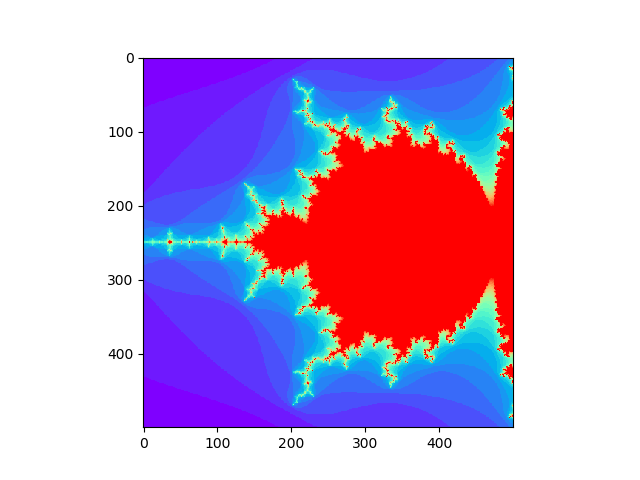

In [32]:
plt.rcdefaults()
#warnings à cause des valeurs qui passent par inf et nan
def mandelbrot(hauteur, largeur, maxiteration=30):
    X, Y = np.meshgrid(np.linspace(-1.7, -0.7, largeur),
                       np.linspace(-0.5, 0.5, hauteur))
    c = X+1j*Y
    z = c
    # on utilise cette fois une matrice d'entiers
    pasbornee = np.zeros(z.shape)
    for i in range(maxiteration):
        z = np.square(z)+c
        pasbornee[np.less(abs(z),2*np.ones(z.shape))] = i 
    return pasbornee  # On retourne la matrice créée


plt.figure()
plt.imshow(mandelbrot(500, 500), cmap='rainbow')   # interpolation induite
plt.show()

In [3]:
def logi(x,mu):
    return(mu*x*(1-x))

<IPython.core.display.Javascript object>


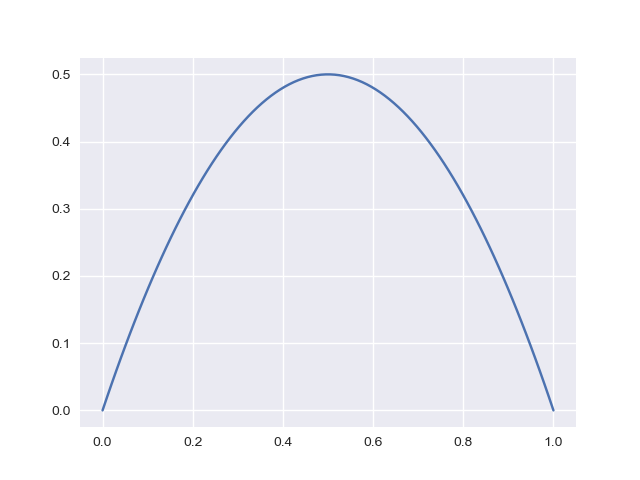

In [3]:
x=np.linspace(0,1,100)
plt.figure()
plt.plot(x,logi(x,2))
plt.show()

to put in a function and widget and make an animation

In [4]:
def logi_branch(x0, mu, nb_iter=100, points=100):
    x = np.linspace(0, 1, points)
    plt.figure()
    plt.plot(x,logi(x,mu))
    plt.plot(x, x)
    for i in range(nb_iter):
        f_x0 = logi(x0, mu)
        plt.plot([x0,x0],[x0,f_x0], 'k', color='red', alpha=.3) # de (x,0) à (x,f(x))
        plt.plot([x0,f_x0],[f_x0,f_x0], 'k', color='red', alpha=.3) # de (x,f(x)) à (f(x),f(x))
        x0 = f_x0
    plt.show()

In [5]:
interact_manual(logi_branch,x0=fixed(0.01), mu=(1.0,4,0.001), nb_iter=widgets.IntSlider(min=10, max=150, step=10, value=60), points=fixed(100))

interactive(children=(FloatSlider(value=2.5, description='mu', max=4.0, min=1.0, step=0.001), IntSlider(value=…

<function __main__.logi_branch(x0, mu, nb_iter=100, points=100)>

In [6]:
interact(logi_branch,x0=fixed(0.01), mu=widgets.FloatSlider(min=-2, max=.25, step=0.001, continuous_update=False),
         nb_iter=widgets.IntSlider(min=10, max=150, step=10, value=60),
         points=fixed(100))

interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='mu', max=0.25, min=-2.0, st…

<function __main__.logi_branch(x0, mu, nb_iter=100, points=100)>

In [2]:
import matplotlib.animation as animation

In [4]:
def logi_branch_points(x0, mu, nb_iter=100):
    points = [(x0, 0)]
    for i in range(nb_iter):
        f_x0 = logi(x0, mu)
        points.append((x0, f_x0))
        points.append((f_x0, f_x0))
        x0 = f_x0
    return points


def plot_logi_interact(x0, mu, nb_iter=100, linsdim=100):
    x, y = zip(*logi_branch_points(x0, mu, nb_iter))
    vals = np.linspace(0, 1, linsdim)
    plt.figure()
    plt.plot(vals, vals)
    plt.plot(vals, logi(vals, mu))
    plt.plot(x, y, 'k', color='red', alpha=.3)
    plt.show()


interact(plot_logi_interact, x0=fixed(0.01), mu=widgets.FloatSlider(min=1, max=4, step=0.001, continuous_update=False),
         nb_iter=widgets.IntSlider(min=10, max=150, step=10, value=60),
         linsdim=fixed(100))

interactive(children=(FloatSlider(value=1.0, continuous_update=False, description='mu', max=4.0, min=1.0, step…

<function __main__.plot_logi_interact(x0, mu, nb_iter=100, linsdim=100)>

<IPython.core.display.Javascript object>


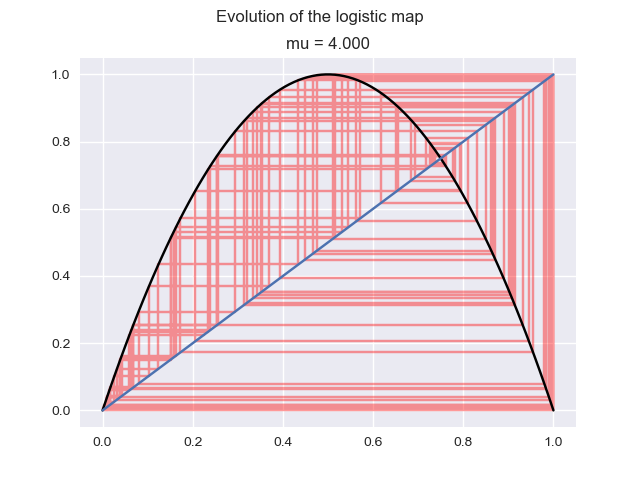

In [5]:
fig, ax = plt.subplots()  # initialise la figure

line, = plt.plot([], [],color='red', alpha=.4)
courbe, = plt.plot([], [], color='black')
x = np.linspace(0, 1, 100)
plt.plot(x, x)
plt.suptitle("Evolution of the logistic map")


# fonction à définir quand blit=True
# crée l'arrière de l'animation qui sera présent sur chaque image


def init():
    line.set_data([], [])
    courbe.set_data([],[])
    return line,


def animate(i):
    line.set_data(zip(*logi_branch_points(.01, 1.015+i*0.015)))
    courbe.set_data(x, logi(x,1.015+i*.015))
    ax.set_title(u"mu = {0:.3f}".format(1.015+i*0.015))
    return line, courbe, 


ani = animation.FuncAnimation(
    fig, animate, init_func=init, frames=200, blit=True, interval=20, repeat=False)

plt.show()

Bifurcation diagram

<IPython.core.display.Javascript object>


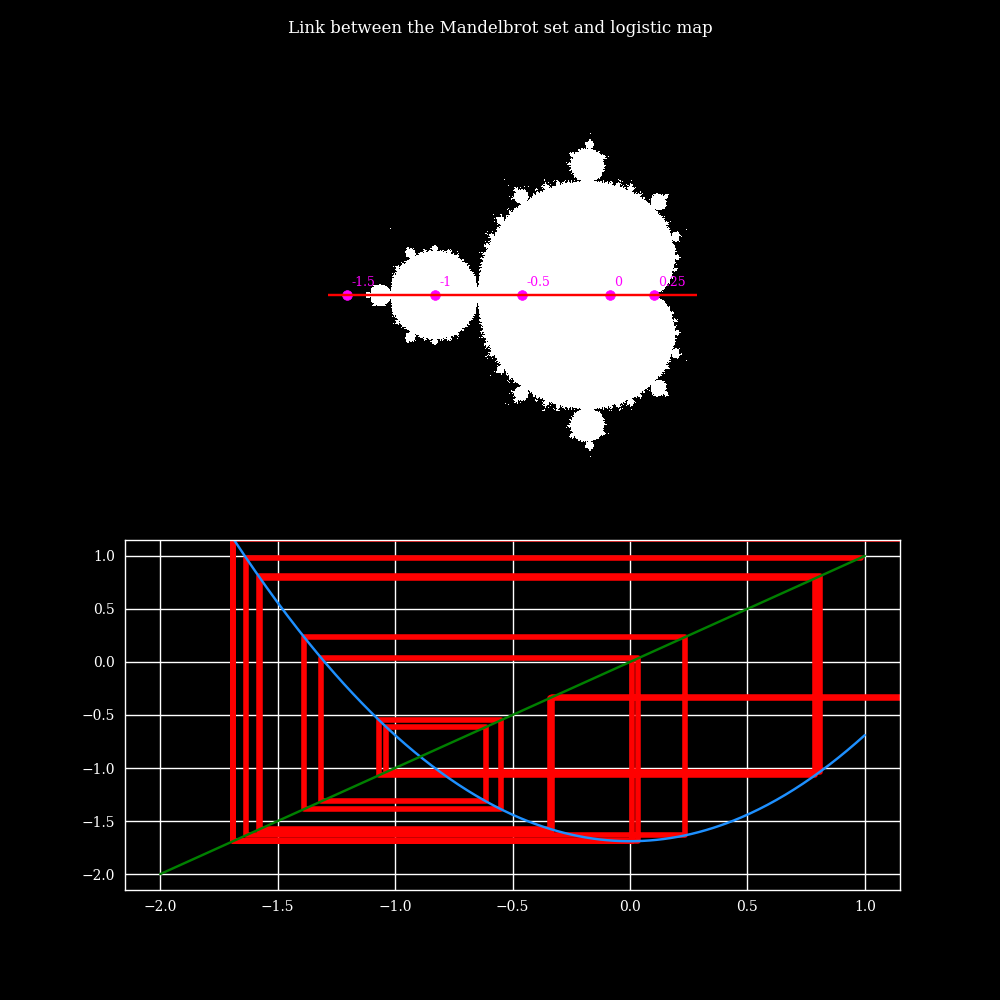

In [9]:
import matplotlib as mpl
mpl.rc('text', usetex=False)
mpl.rc('font', family='serif')


def mandel_branch_points(x0, mu, nb_iter=20):
    points = [(x0, 0)]
    for i in range(nb_iter):
        f_x0 = x0**2+mu
        points.append((x0, f_x0))
        points.append((f_x0, f_x0))
        x0 = f_x0
    return points

from matplotlib import colors as mcolors


plt.style.use(['ggplot', 'dark_background'])
# plt.style.use('seaborn')
title = 'Link between the Mandelbrot set and logistic map'

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))
plt.subplot(211)
plt.suptitle(title)
backgrd = Mandelbrot_disp(-.5, 0, 1, precision=400, t_max=100).mandelbrot()
plt.imshow(backgrd, cmap='bone_r', origin="lower")
xl, = plt.plot([],[],color='red')
plt.axhline(y=200, color='red')  # x=350 => x_m=.25
x_coord = [350, 300, 200, 100, 0]
y_coord = [200]*5
to_disp = ['0.25', '0', '-0.5', '-1', '-1.5']
for i, to_disp in enumerate(to_disp):
    x = x_coord[i]
    y = y_coord[i]
    plt.scatter(x, y, color='magenta', marker='o')
    plt.text(x+5, y+10, to_disp, fontsize=9, color='magenta')
plt.axis('off')

plt.subplot(212)
line, = plt.plot([], [], color='red', alpha=1, lw=4)
courbe, = plt.plot([], [], color='dodgerblue')
x = np.linspace(-2, 1, 400)
plt.plot(x, x, color='green')


def init():
    line.set_data([], [])
    xl.set_data([], [])
    courbe.set_data([], [])
    return line,


def animate(i):
    line.set_data(zip(*mandel_branch_points(.01, 0.3-0.01*i)))
    courbe.set_data(x, x**2+(0.3-0.01*i))
    xl.set_data((.3-0.01*i)*200+300, [0,400])
    ax2.set_title(u"c = {0:.3f}".format(0.3-0.01*i))
    return line, courbe,

ani_both = animation.FuncAnimation(
    fig, animate, init_func=init, frames=200, interval=20, repeat=False)
ani_both.save('basic_animation.mp4')

In [13]:
r = np.linspace(2.7, 4, 10000)
x = []
y = []
for i in r:
    x.append(i)
    x0 = np.random.random()
    for _ in range(500):
        x0 = code_python.logistic(i, x0)
    y.append(x0)
plt.plot(x, y, ls='', marker=',', color='blue')
plt.show()

NameError: name 'code_python' is not defined

<IPython.core.display.Javascript object>


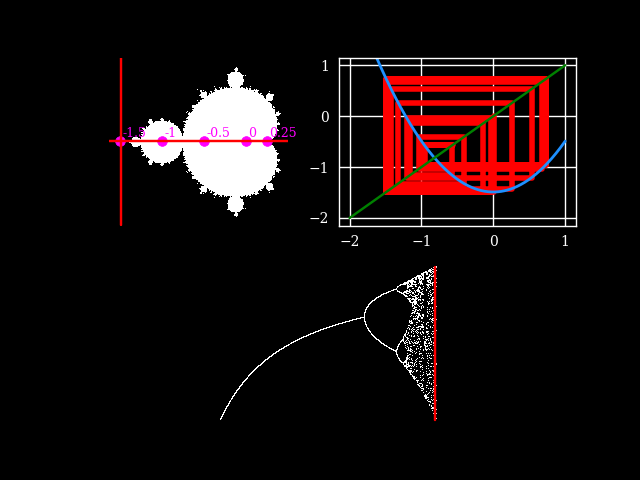

In [17]:
import matplotlib.gridspec as gridspec

fig=plt.figure()
gs = gridspec.GridSpec(2, 4)

ax1 = plt.subplot(gs[0, :2], )
backgrd = Mandelbrot_disp(-.5, 0, 1, precision=400, t_max=100).mandelbrot()
ax1.imshow(backgrd, cmap='bone_r', origin="lower")
xl, = ax1.plot([],[],color='red')
ax1.axhline(y=200, color='red')  # x=350 => x_m=.25
x_coord = [350, 300, 200, 100, 0]
y_coord = [200]*5
to_disp = ['0.25', '0', '-0.5', '-1', '-1.5']
for i, to_disp in enumerate(to_disp):
    x = x_coord[i]
    y = y_coord[i]
    ax1.scatter(x, y, color='magenta', marker='o')
    ax1.text(x+5, y+10, to_disp, fontsize=9, color='magenta')
ax1.axis('off')


ax2 = plt.subplot(gs[0, 2:])

line, = ax2.plot([], [], color='red', alpha=1, lw=4)
courbe, = ax2.plot([], [], color='dodgerblue', alpha=1, lw=2)
x = np.linspace(-2, 1, 400)
ax2.plot(x, x, color='green')

ax3 = plt.subplot(gs[1, 1:3])
r = np.linspace(1, 4, 10000)
x_vals = []
y_vals = []
for i in r:
    x_vals.append(i)
    x0 = np.random.random()
    for _ in range(1000):
        x0 = i*x0*(1-x0)
    y_vals.append(x0)
ax3.plot(x_vals, y_vals, ls='', marker=',', color='white')
xl3, = ax3.plot([],[],color='red')
ax3.axis('off')


def init():
    line.set_data([], [])
    xl.set_data([], [])
    courbe.set_data([], [])
    xl3.set_data([],[])
    return line, xl, courbe,


def animate(i):
    line.set_data(zip(*mandel_branch_points(.01, 0.3-0.01*i)))
    courbe.set_data(x, x**2+(0.3-0.01*i))
    xl.set_data((.3-0.01*i)*200+300, [0,400])
    xl3.set_data(1.3+.015*i,[0,1])
    return courbe, xl,

ani_three = animation.FuncAnimation(
    fig, animate, init_func=init, frames=180, interval=20, repeat=False)  #vitesses pas correctes
FFwriter = animation.FFMpegWriter(fps=10)     
ani_three.save('les_3.avi', writer = FFwriter, dpi=300 )